In [1]:
import numpy as np
from GridWorldMDP import GridWorldMDP
from GridDisplay import GridDisplay
from RL import ModelBasedRL
from RL import ModelFreeRL
from OpenAIGym import OpenAIGymMDP
from OpenAIGym import OpenAIGymSim
import gym

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Creating grid world MDP

## - Default is to have -1 reward for each move and no noise meaning if an action is chosen it will be executed unless that actions is not a legal move, in which case the move will lead you to stay in the same grid square.

In [44]:
grid_rows = 4
grid_cols = 4
num_actions = 4
terminal_states = [0, 15]

mdp = GridWorldMDP(grid_rows, grid_cols, num_actions, terminal_states)

# Creating model based RL object for dynamic programming methods of iterative policy evaluation, policy iteration, value iteration, and q-value iteration

In [4]:
model_rl = ModelBasedRL()

In [45]:
mdp.idx_to_action_names

{0: 'N', 1: 'S', 2: 'E', 3: 'W'}

In [46]:
mdp.states_to_idx

{(0, 0): 0,
 (0, 1): 1,
 (0, 2): 2,
 (0, 3): 3,
 (1, 0): 4,
 (1, 1): 5,
 (1, 2): 6,
 (1, 3): 7,
 (2, 0): 8,
 (2, 1): 9,
 (2, 2): 10,
 (2, 3): 11,
 (3, 0): 12,
 (3, 1): 13,
 (3, 2): 14,
 (3, 3): 15}

# Iterative policy evaluation under random policy

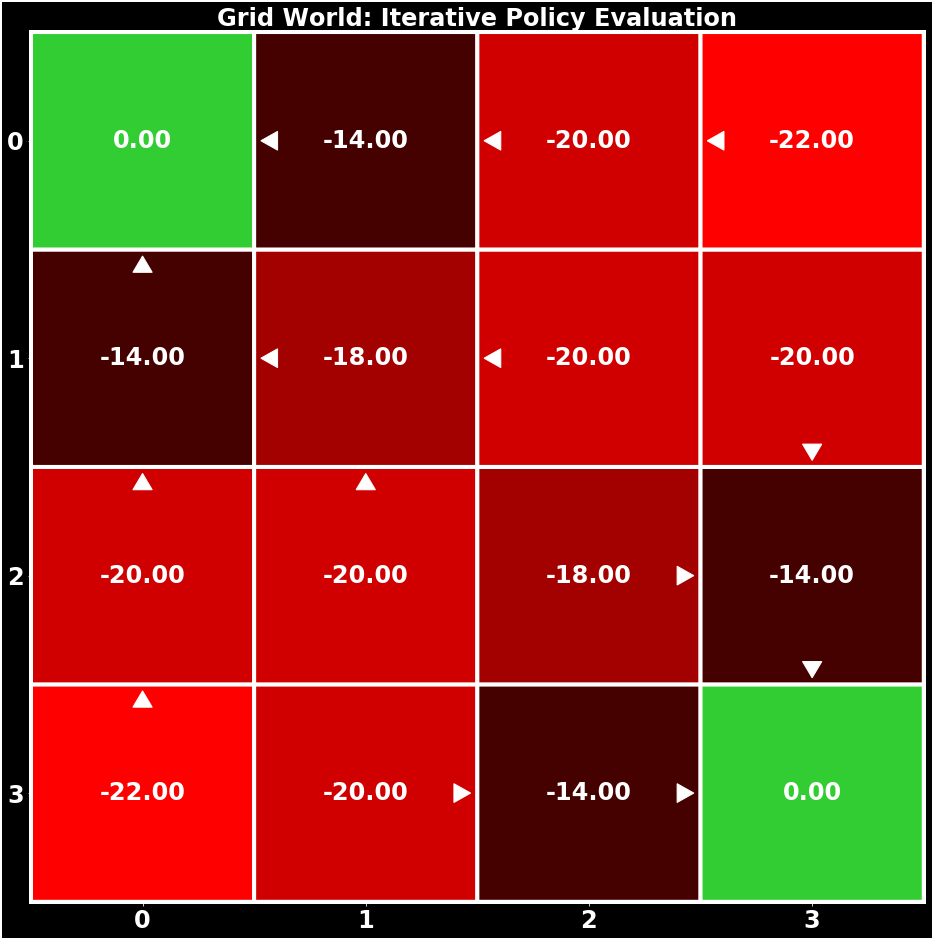

In [5]:
model_rl.iterative_policy_evaluation(mdp)

display = GridDisplay(model_rl, mdp)
display.show_values(title='Grid World: Iterative Policy Evaluation')

# Policy Iteration to find optimal policy and the value function under the optimal policy

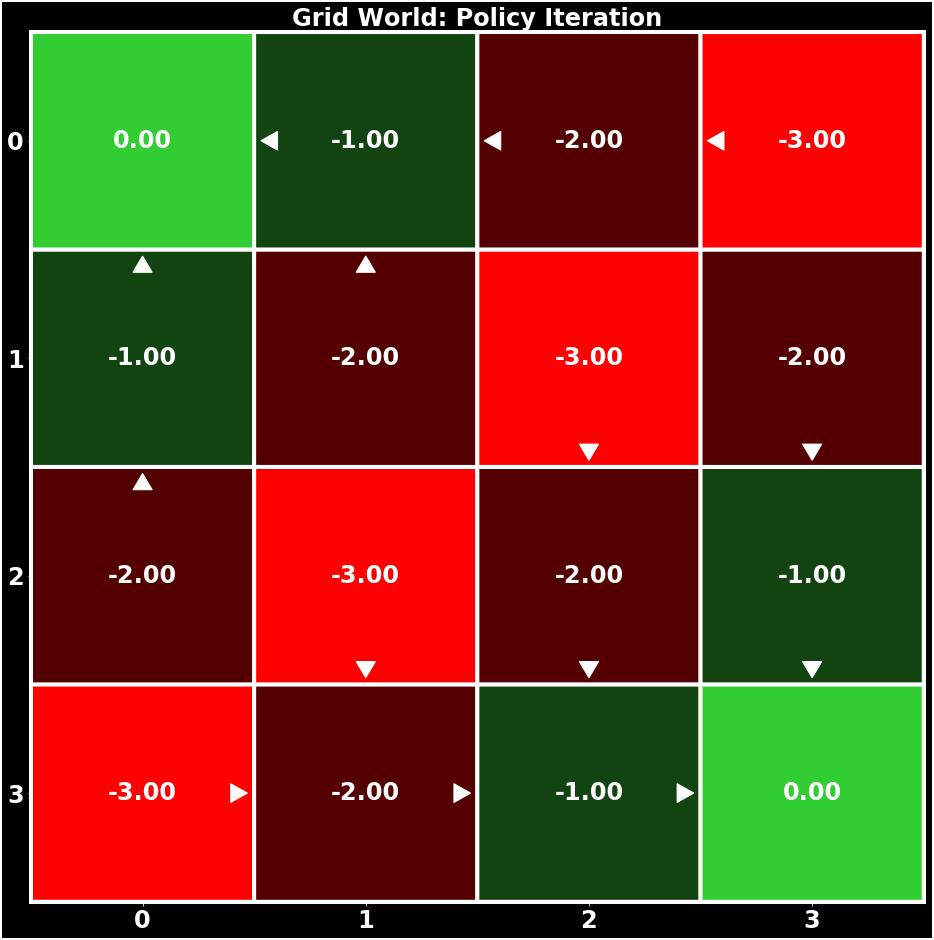

In [6]:
model_rl.policy_iteration(mdp)

display = GridDisplay(model_rl, mdp)
display.show_values(title='Grid World: Policy Iteration', )

# Value iteration

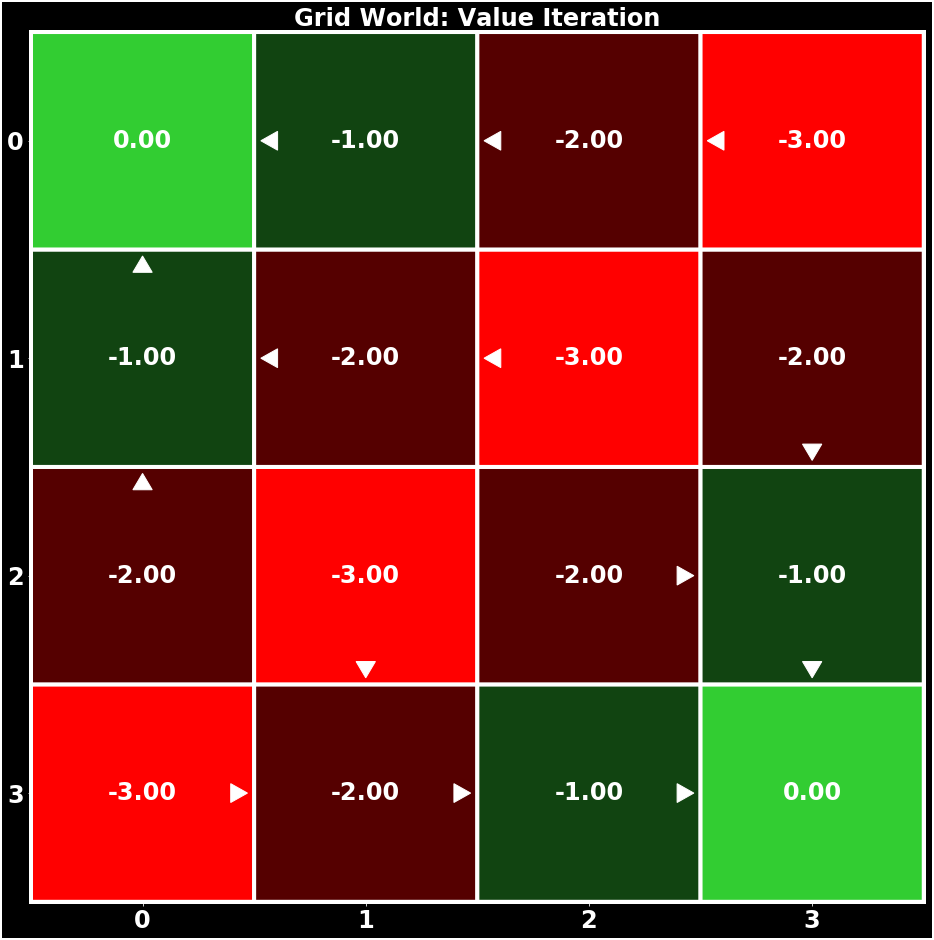

In [7]:
model_rl.value_iteration(mdp)

display = GridDisplay(model_rl, mdp)
display.show_values(title='Grid World: Value Iteration')

# Q-Value iteration

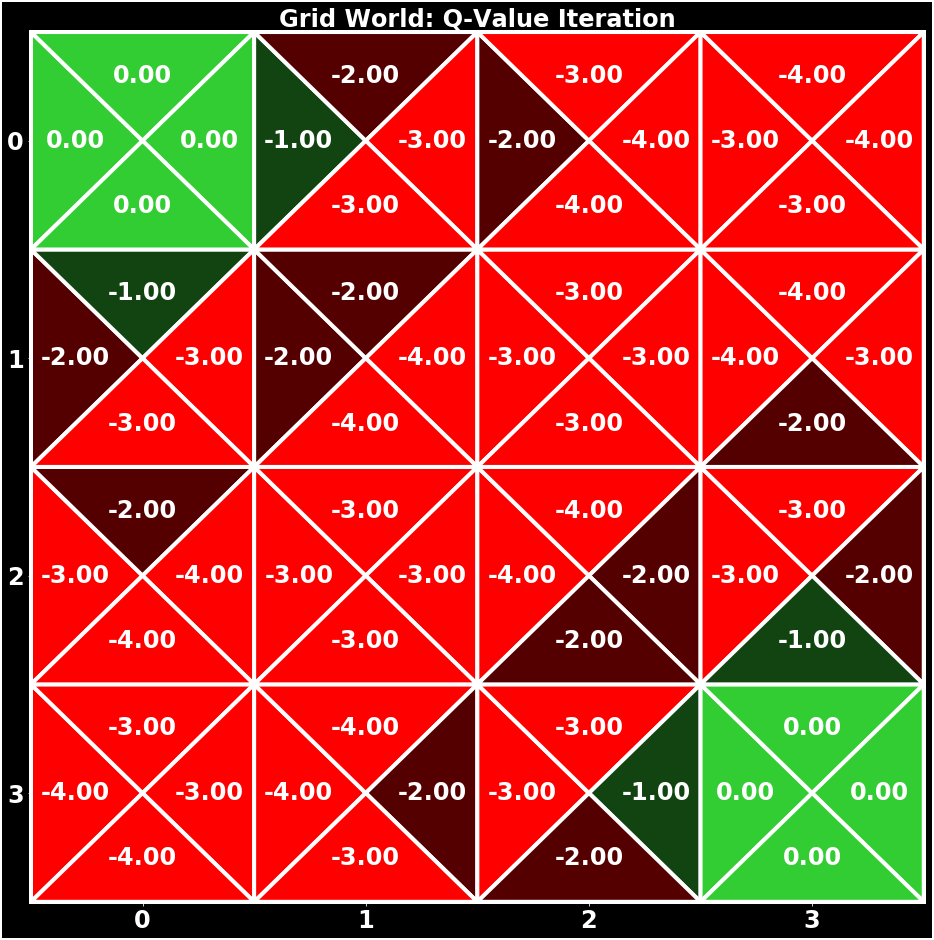

In [8]:
model_rl.q_value_iteration(mdp)
display = GridDisplay(model_rl, mdp)

display.show_q_values(title='Grid World: Q-Value Iteration')

# Creating MDP from simulated experience in OpenAI Gym environment, In this environment the blue state indicates the location the passenger should be picked up and the pink state indicates where the passenger should be dropped off. A reward of -1 is given for each ordinary move, a reward of -10 is given for picking up the wrong passenger, and a reward of 20 is given for dropping off the correct passenger in the correct location. Episodes end either when the incorrect passenger is picked up or when the correct passenger is dropped off in a location.

In [9]:
mdp = OpenAIGymMDP(gym_name="Taxi-v2")

[2017-07-31 13:55:54,579] Making new env: Taxi-v2


# OpenAI Gym Taxi Example with Value Iteration

In [10]:
model_rl.value_iteration(mdp)
policy = model_rl.policy
average_reward = OpenAIGymSim().simulate_model(policy, gym_name="Taxi-v2")

print '\n\n'
print 'Average Reward Per Episode:', average_reward

[2017-07-31 13:58:31,436] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+

# OpenAI Gym Taxi Example with Policy Iteration

In [11]:
# Changing number of iterations to speed up results. Results are still good without complete convergence.

# Number of evaluations for each state in policy evaluation.
model_rl.max_eval = 10

# Number of iterations of both policy evaluation and policy improvement.
model_rl.max_iter = 100

model_rl.policy_iteration(mdp)
policy = model_rl.policy
average_reward = OpenAIGymSim().simulate_model(policy, gym_name="Taxi-v2")

print '\n\n'
print 'Average Reward Per Episode:', average_reward

[2017-07-31 13:59:14,186] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B:

# OpenAI Gym Taxi Example with Q-Value Iteration

In [12]:
model_rl.max_eval = 100

model_rl.q_value_iteration(mdp)
policy = model_rl.policy
average_reward = OpenAIGymSim().simulate_model(policy, gym_name="Taxi-v2")

print '\n\n'
print 'Average Reward Per Episode:', average_reward

[2017-07-31 13:59:35,347] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |

# OpenAI Gym Taxi Example with Q-Learning

[2017-07-31 13:59:35,558] Making new env: Taxi-v2


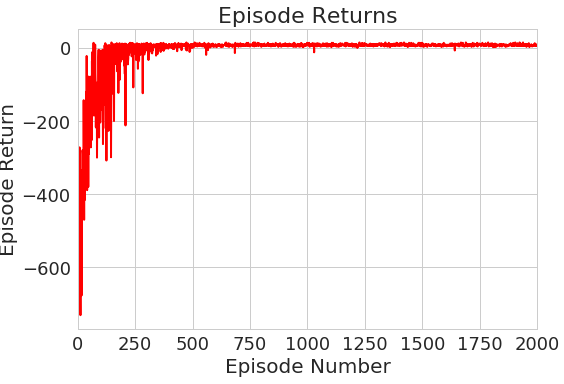

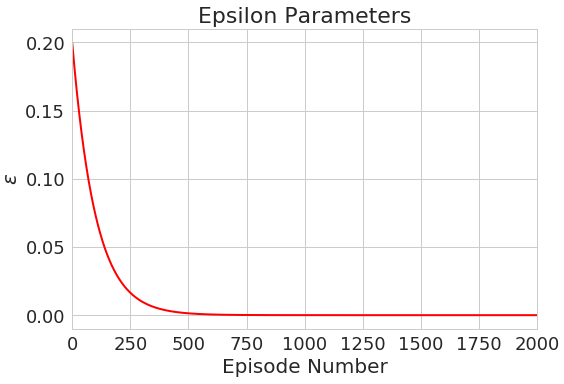

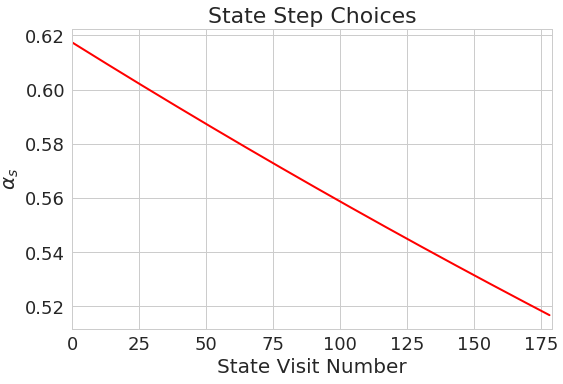

[2017-07-31 13:59:40,293] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+

In [13]:
# Creating environment.
env = gym.make("Taxi-v2")
env.reset()

# Creating parameters needed for ModelFreeRL class.
n = env.observation_space.n
states = range(n)
m = env.action_space.n
actions = range(m)
idx_to_action_names = {a:a for a in actions}

# Creating instance of the class, using epsilon greedy decay and step size decay.
model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions, idx_to_action_names=idx_to_action_names)

# Running the q-learning algorithm.
model_free_rl.q_learning(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

"""
Simulating 100 episodes with the learned policy that is the greedy policy of the q learning finish, 
and rendering the final episode of the simulation.
"""
average_reward = OpenAIGymSim().simulate_model(model_free_rl.policy, gym_name="Taxi-v2", num_episodes=100)

print '\n\n'
print 'Average Reward Per Episode:', average_reward

# OpenAI Gym Frozen Lake Example with Q-Learning. This environment has holes to fall into that end an episode and give 0 reward like all other steps. Ending up in the goal state gives reward 1 and ends the episode. Moves are also uncertain with actions possibly resulting in a different action than intended.

[2017-07-31 13:59:40,361] Making new env: FrozenLake-v0


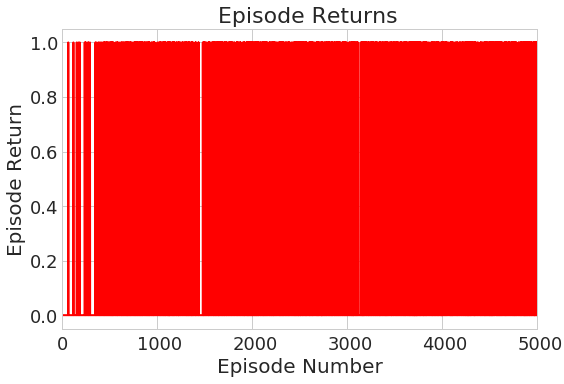

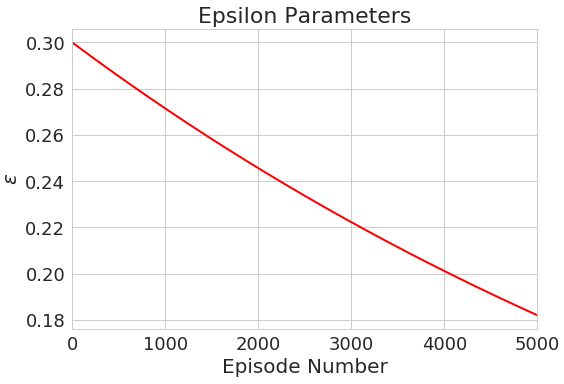

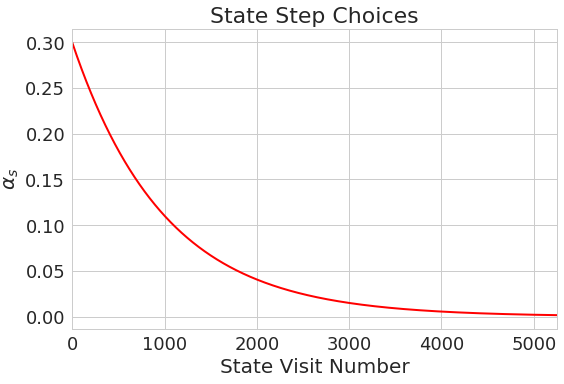

[2017-07-31 13:59:47,751] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG



Average Reward Per Episode: 0.74


In [14]:
# Creating environment.
env = gym.make("FrozenLake-v0")
env.reset()

# Creating parameters needed for ModelFreeRL class.
n = env.observation_space.n
states = range(n)
m = env.action_space.n
actions = range(m)
idx_to_action_names = {a:a for a in actions}

# Creating instance of the class, using epsilon greedy decay and step size decay.
model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions, idx_to_action_names=idx_to_action_names, 
                           epsilon=.3, alpha=.3, epsilon_decay_param=.0001, num_episodes=5000)

# Running the q-learning algorithm.
model_free_rl.q_learning(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

"""
Simulating 100 episodes with the learned policy that is the greedy policy of the q learning finish, 
and rendering the final episode of the simulation.
"""
average_reward = OpenAIGymSim().simulate_model(model_free_rl.policy, gym_name="FrozenLake-v0", num_episodes=100)

print '\n\n'
print 'Average Reward Per Episode:', average_reward

In [39]:
def test():
    return 1

In [42]:
test()
print 'waht'

waht


# SARSA

[2017-07-31 15:34:01,467] Making new env: Taxi-v2


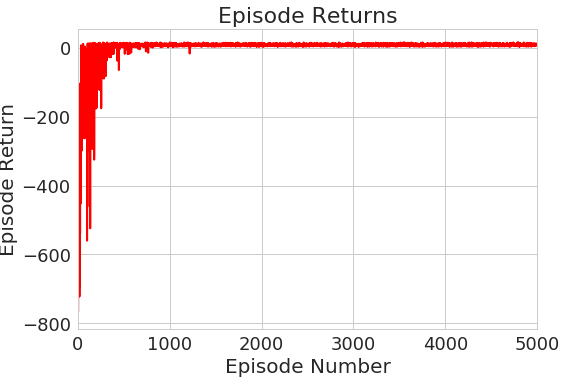

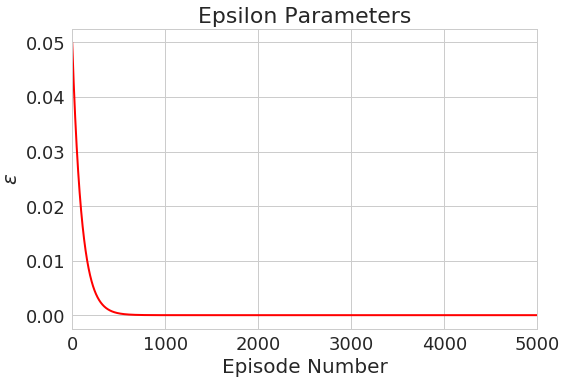

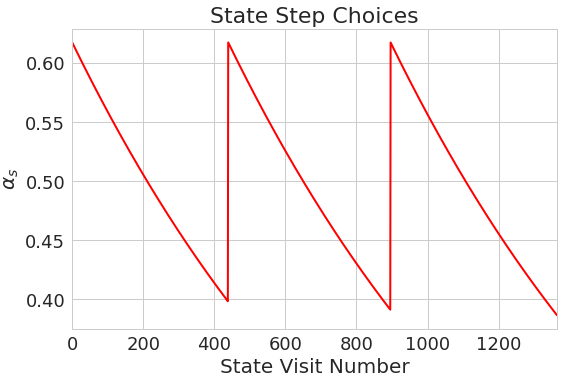

[2017-07-31 15:34:07,447] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |

In [27]:
# Creating environment.
env = gym.make("Taxi-v2")
env.reset()

# Creating parameters needed for ModelFreeRL class.
n = env.observation_space.n
states = range(n)
m = env.action_space.n
actions = range(m)
idx_to_action_names = {a:a for a in actions}

# Creating instance of the class, using epsilon greedy decay and step size decay.
#model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions, num_episodes=5000,
#epsilon=.05, idx_to_action_names=idx_to_action_names)

# Running the q-learning algorithm.
model_free_rl.sarsa(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

"""
Simulating 100 episodes with the learned policy that is the greedy policy of the q learning finish, 
and rendering the final episode of the simulation.
"""
average_reward = OpenAIGymSim().simulate_model(model_free_rl.policy, gym_name="Taxi-v2", num_episodes=100)

print '\n\n'
print 'Average Reward Per Episode:', average_reward

# One step temporal difference 

# - Evaluating the value function for the optimal policy from earlier using one step temporal difference.

In [ ]:
rl.one_step_temporal_difference()

display = GridDisplay(rl, title='Grid World: One Step Temporal Difference')
display.show_values()

In [ ]:
rl.q_learning()
display = grid_display(rl, title='Grid World: Q-Learning')

display.show_q_values()

# Creating a Noisy Reward MDP.

In [ ]:
mdp = grid_world_mdp(grid_rows, grid_cols, actions, terminal_states, prob_noise=.5, reward_noise=.5)
rl = RL(mdp)

# Risk Sensitive Q Learning

In [ ]:
rl.q_value_iteration()
display = grid_display(rl, title='Grid World: Q-Value Iteration')
display.show_q_values()

In [ ]:
rl.q_learning(policy_strategy='e-greedy', alpha=.05, epsilon=.05, num_episodes=10000)
display = grid_display(rl, title='Grid World: Q-Learning')
display.show_q_values()

In [ ]:
rl.risk_q_learning(policy_strategy='e-greedy', alpha=.1, epsilon=.05, rho_minus=1, rho_plus=1, num_episodes=10000)
display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
display.show_q_values()

In [ ]:
rl.risk_q_learning(rho_minus=1.5, rho_plus=1.5, num_episodes=10000)
display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
display.show_q_values()

# Expected Utility Q Learning

In [ ]:
rl.eu_q_learning(alpha=.1, tau=100, util_choice='prospect', rho_minus=.5, rho_plus=.5)
display = grid_display(rl, title='Grid World: Expected Utility Q-Learning', savefig=True)
display.show_q_values()